## Explore BLS catalog

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
from atlas_ql.utils.bls import get_catalog

catalog = get_catalog()
catalog.head()

,pow,snr,wid,per_day,per_min,q,phi0,dphi,epo
gid,,,,,,,,,
2244014927767735808,22.39516,0.54545,67,0.001495,2.15341,0.040,0.28513,0.08614,57233.37730
1909037887044868864,2.60915,0.45238,25,0.002220,3.19672,0.010,0.41278,0.03197,57300.32926
1734682143474825472,8.82514,2.00000,3,0.017445,25.12122,0.010,0.38045,0.25121,57229.42494
6027934755393713152,22.87113,0.53846,10,0.021470,30.91617,0.046,0.36309,1.42214,57457.68225
6081671290255564800,14.05801,8.94444,12,0.011726,16.88501,0.010,0.78770,0.16885,57457.56908


In [26]:
from atlas_ql.utils.paths import lc_path
import os

mask = (catalog['per_min'] < 70) & (catalog['pow'] > 20)
cat = catalog[mask].sort_values('pow', ascending=False)
for i in range(100):
    gid = cat.iloc[i].name
    if os.path.exists(lc_path(gid)):
        print(cat.iloc[i])

pow          291.809090
snr            0.680900
wid           34.000000
per_day        0.030881
per_min       44.468120
q              0.061000
phi0           0.782760
dphi           2.712560
epo        57328.712770
Name: 1076814928935303936, dtype: float64
pow          282.099610
snr            0.162650
wid            5.000000
per_day        0.006595
per_min        9.496780
q              0.037000
phi0           0.444730
dphi           0.351380
epo        57277.484860
Name: 2574640827310228992, dtype: float64
pow          242.66815
snr            4.00517
wid           20.00000
per_day        0.00189
per_min        2.72223
q              0.01000
phi0           0.17568
dphi           0.02722
epo        59580.07530
Name: 5339171259860907008, dtype: float64
pow          199.748710
snr            1.071430
wid           99.000000
per_day        0.034647
per_min       49.891020
q              0.150000
phi0           0.348490
dphi           7.483650
epo        57240.371530
Name: 1288793344772

In [3]:
# from atlas_ql.utils.plotting import plot_scatter

# # Period vs SNR colored by width (the classic ultracompact finder)
# fig = plot_scatter(catalog, 'per_min', 'snr', color_col='wid',
#                    reference_x=[30, 60], reference_y=10,
#                    xlabel='Period (minutes)', ylabel='BLS SNR',
#                    colorbar_label='Eclipse Width (phase)',
#                    title='Period vs SNR - Ultracompact Search',
#                    vmin=0, vmax=0.2)

# # Width vs SNR colored by log period
# catalog['log_per_min'] = np.log10(catalog['per_min'])
# fig = plot_scatter(catalog, 'wid', 'snr', color_col='log_per_min',
#                    xscale='linear', 
#                    xlabel='Eclipse Width (phase)',
#                    colorbar_label='log10(Period [min])')

# # Power vs SNR (no color mapping)
# fig = plot_scatter(catalog, 'pow', 'snr',
#                    xlabel='BLS Power', ylabel='BLS SNR',
#                    color='darkblue', alpha=0.5)

# # Period vs power with custom colormap
# fig = plot_scatter(catalog, 'per_min', 'pow', color_col='snr',
#                    cmap='plasma', s=30, alpha=0.7,
#                    xlabel='Period (minutes)', ylabel='BLS Power',
#                    colorbar_label='SNR')

FileNotFoundError: [Errno 2] No such file or directory: '/orcd/data/kburdge/001/ATLAS/ATLAS_Lightcurves/5813812390664455168'

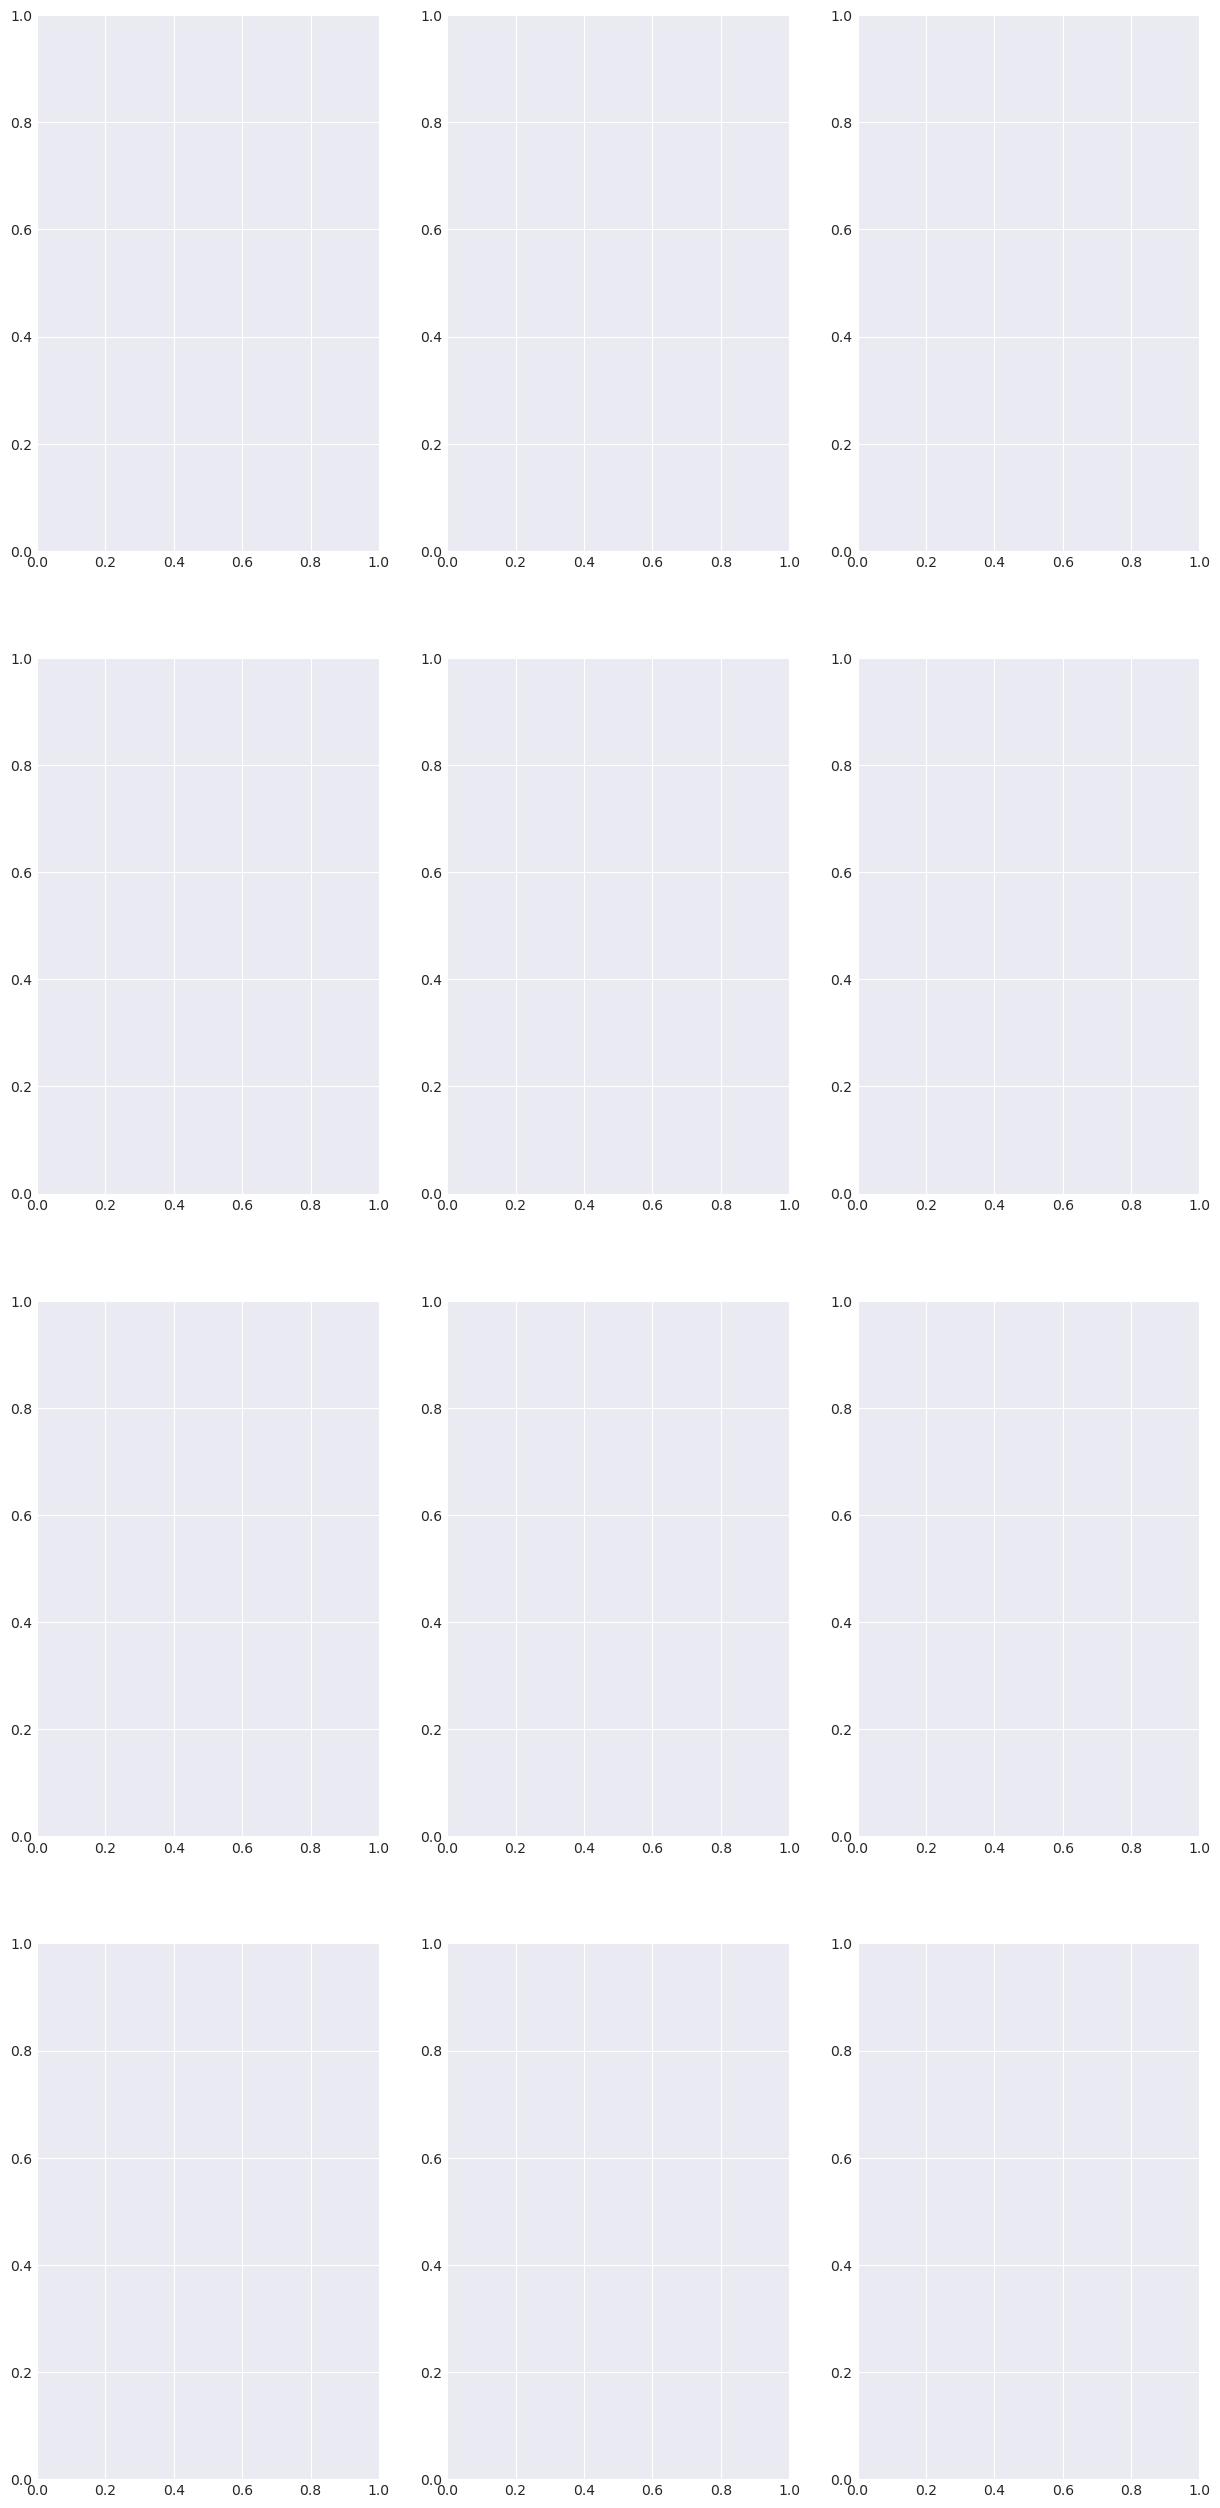

In [4]:
from atlas_ql.utils.plotting import plot_multi_lightcurves
plot_multi_lightcurves(cat, gid_col='gid', num_bins=100)